In [1]:
import pandas as pd

data = pd.read_csv('datasets/2020-2025.csv')

In [2]:
data = data.drop(columns='Country')

In [3]:
data

,2020,2021,2022,2023,2024,2025
0,20136,14278.0,14501.0,17248.0,NaN,NaN
1,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,66521,84375.0,142442.0,109764.0,115946.0,113343.0
...,...,...,...,...,...,...
191,346310,370076.0,411068.0,433008.0,459472.0,490970.0
192,15532,18109.0,19166.0,17848.0,NaN,NaN
193,20220,19394.0,23534.0,19412.0,19101.0,17401.0
194,18138,22096.0,29164.0,27578.0,26326.0,28910.0


In [4]:
data.isnull().sum()

2020    0
2021    2
2022    2
2023    2
2024    4
2025    7
dtype: int64

In [5]:
data = data.dropna(subset=['2021', '2022', '2023', '2024', '2025'])

In [6]:
data.isnull().sum()

2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
dtype: int64

In [7]:
data.value_counts()

2020      2021        2022        2023        2024        2025      
52        62.0        61.0        63.0        65.0        65.0          1
125       176.0       152.0       152.0       161.0       169.0         1
222       285.0       271.0       289.0       308.0       312.0         1
242       259.0       253.0       259.0       280.0       297.0         1
259       236.0       248.0       275.0       306.0       333.0         1
                                                                       ..
2698705   3144079.0   3125404.0   3371118.0   3644636.0   3839180.0     1
3936989   4351188.0   4166872.0   4527009.0   4658526.0   4744804.0     1
5054069   5039148.0   4262146.0   4213167.0   4026211.0   4186431.0     1
15103357  18190803.0  18307816.0  18270351.0  18748009.0  19231705.0    1
21354125  23681175.0  26006900.0  27720725.0  29184900.0  30507217.0    1
Name: count, Length: 189, dtype: int64

In [8]:
data.describe()

,2020,2021,2022,2023,2024,2025
count,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02
mean,4.514222e+05,5.151044e+05,5.367216e+05,5.605903e+05,5.821778e+05,5.991414e+05
std,1.977386e+06,2.249103e+06,2.377764e+06,2.484240e+06,2.593048e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,8.628000e+03,9.484000e+03,1.253100e+04,1.240200e+04,1.337000e+04,1.421400e+04
50%,3.543200e+04,3.820900e+04,4.195300e+04,4.395800e+04,4.694300e+04,4.782900e+04
75%,2.105410e+05,2.562260e+05,2.804740e+05,2.897810e+05,2.890700e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


In [9]:
X = data.drop('2025', axis=1)
y = data['2025']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.9988535535640458

In [11]:
X_test[1:5]

,2020,2021,2022,2023,2024
151,1384,1490.0,2018.0,2187.0,2168.0
61,15364,19455.0,20485.0,20059.0,20774.0
24,1476092,1670650.0,1951849.0,2191137.0,2171337.0
141,144411,179732.0,235709.0,213003.0,221452.0


In [12]:
y_test[1:5]

151       2198.0
61       20391.0
24     2125958.0
141     222776.0
Name: 2025, dtype: float64

In [13]:
y_pred = model.predict(X_test[1:5])
y_pred

array([1.06792720e+03, 1.97141215e+04, 2.21234763e+06, 2.28019159e+05])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


y_pred2 = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)

MAE:  16125.321278786409
MSE:  3737288596.7704306


In [15]:
mape = np.mean(np.abs((y_test - y_pred2) / y_test)) * 100
print("Erro percentual médio (MAPE):", mape, "%")

Erro percentual médio (MAPE): 41.17086238321577 %


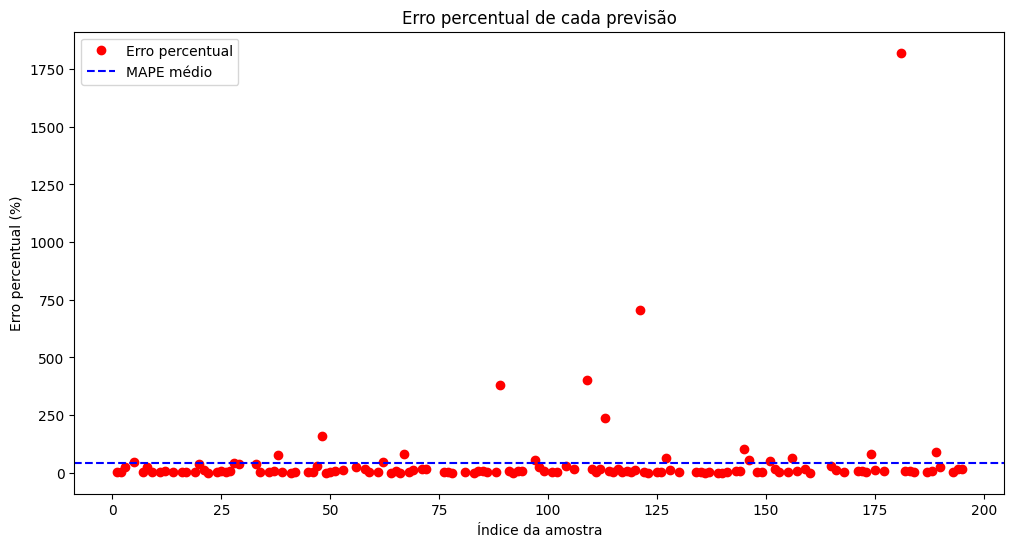

In [16]:
import matplotlib.pyplot as plt
import numpy as np

y_true = y_test
y_pred = model.predict(X_test)

erros_absolutos = np.abs(y_true - y_pred)
erros_percentuais = erros_absolutos / y_true * 100

plt.figure(figsize=(12,6))
plt.plot(erros_percentuais, 'o', color='red', label='Erro percentual')
plt.axhline(y=np.mean(erros_percentuais), color='blue', linestyle='--', label='MAPE médio')
plt.xlabel('Índice da amostra')
plt.ylabel('Erro percentual (%)')
plt.title('Erro percentual de cada previsão')
plt.legend()
plt.show()
